In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fraud_file = os.path.join(os.curdir, 'Fraud_Data.csv')
ip_file = os.path.join(os.curdir, 'IpAddress_to_Country.csv')

In [3]:
fraud = pd.read_csv(fraud_file, parse_dates=['signup_time', 'purchase_time'])
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [4]:
ip = pd.read_csv(ip_file)
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [5]:
fraud.head(20)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [6]:
fraud['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [7]:
fraud['purchase_value'].max()

154

In [8]:
fraud['purchase_value'].min()

9

In [9]:
fraud['user_id'].unique().shape

(151112,)

In [10]:
fraud['device_id'].unique().shape

(137956,)

In [11]:
fraud['signup_time'].min()

Timestamp('2015-01-01 00:00:42')

In [12]:
fraud['signup_time'].max()

Timestamp('2015-08-18 04:40:29')

In [13]:
fraud['purchase_time'].min()

Timestamp('2015-01-01 00:00:44')

In [14]:
fraud['purchase_time'].max()

Timestamp('2015-12-16 02:56:05')

In [15]:
fraud_device = set(fraud[fraud['class'] == 1]['device_id'])
clean_device = set(fraud[fraud['class'] == 0]['device_id'])

In [16]:
len(fraud_device.intersection(clean_device))

2685

In [17]:
fraud['age'].max()

76

In [18]:
fraud['age'].min()

18

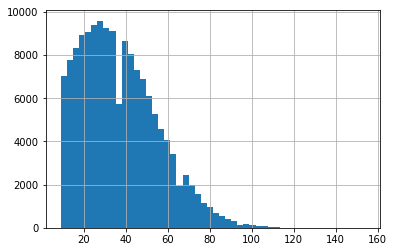

In [19]:
fraud['purchase_value'].hist(bins=50)

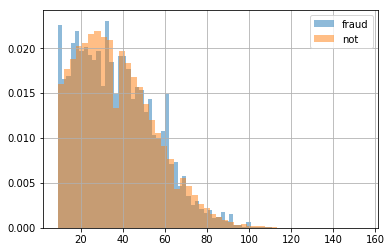

In [20]:
fraud[fraud['class'] == 1]['purchase_value'].hist(bins=50, alpha=0.5, normed=1, label='fraud')
fraud[fraud['class'] == 0]['purchase_value'].hist(bins=50, alpha=0.5, normed=1, label='not')
plt.legend()

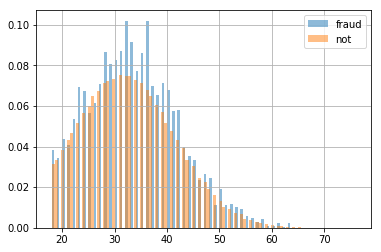

In [21]:
fraud[fraud['class'] == 1]['age'].hist(bins=100, alpha=0.5, normed=1, label='fraud')
fraud[fraud['class'] == 0]['age'].hist(bins=100, alpha=0.5, normed=1, label='not')
plt.legend()

In [22]:
ip.head(20)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [23]:
from multiprocessing import Pool, cpu_count
from joblib import Parallel, delayed
import time

# def check_ip(x):
#     return ip[(ip['lower_bound_ip_address'] <= x) & (ip['upper_bound_ip_address'] >= x)]['country'].values

# s = time.time()
# fraud['country'] = Parallel(n_jobs=cpu_count())(delayed(check_ip)(x) for x in fraud['ip_address'])
# print time.time()- s

In [24]:
def create_ip_dict_helper(row):
    return (row['lower_bound_ip_address'], [row['upper_bound_ip_address'], row['country']])

def create_ip_dict(df):
    ip_dict = dict()
    for ix, row in df.iterrows():
        ip = row['lower_bound_ip_address']
        ip_dict[ip] = [row['upper_bound_ip_address'], row['country']]
    return ip_dict
s = time.time()
aaa = create_ip_dict(ip)
print len(aaa)
print time.time() - s

138846
9.26893401146


In [25]:
def found_lower_bound(arr, tar):
    '''
    found lower bound of an ip by bisection search
    '''
    if tar > 3758096383 or tar < 16777216:
        return None
    n = len(arr)
    if n == 0:
        return None
    if arr[n/2] == tar:
        return tar
    elif  arr[n/2] < tar:
        if ip_dict[arr[n/2]][0] >= tar:
            return arr[n/2]
        elif ip_dict[arr[n/2]][0] < tar:
            return found_lower_bound(arr[n/2 + 1:], tar)                                      
    elif arr[n/2] > tar:
        return found_lower_bound(arr[:n/2], tar)

def get_country(x):
    lower_bound = found_lower_bound(ip['lower_bound_ip_address'].values, x)
    if lower_bound in ip_dict:
        return ip_dict[lower_bound][1]

s = time.time()
ip_dict = create_ip_dict(ip)
fraud['country'] = fraud['ip_address'].apply(get_country)
print time.time() - s

11.7717728615


In [26]:
fraud.head(100)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,None
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,United States


In [27]:
(fraud.groupby(['device_id']).apply(lambda x:x['ip_address'].unique().shape[0]) > 1).sum()

5465

In [28]:
(fraud.groupby(['device_id']).apply(lambda x:x['user_id'].unique().shape[0]) > 1).sum()

6175

In [29]:
(fraud.groupby(['device_id']).apply(lambda x:x['country'].unique().shape[0]) > 1).sum()

4473

In [30]:
fraud.groupby(['device_id']).apply(lambda x:x['country'].unique())

device_id
AAALBGNHHVMKG          [United Kingdom]
AAAWIHVCQELTP           [United States]
AAAXJHWCLISKY                    [None]
AAAXXOZJRZRAO          [United Kingdom]
AABFGRPBQHWFQ                    [None]
AABGCAPIYUWNC                    [None]
AABJEESQPJHDQ      [Russian Federation]
AABNLBQBKMWRG           [United States]
AABOMYDURXEQT           [United States]
AABOOVEJUXMKC                   [China]
AABOYHXAZBTLZ           [United States]
AABQZGLRSEYGR           [United States]
AABVEORDXZXUO           [United States]
AABZHGGYUMVEQ           [United States]
AACBIMMVQIFWW                   [China]
AACEEKSUWDCSU           [United States]
AACIHTWABTEMZ          [United Kingdom]
AACOSZDJHOJIZ                 [Ukraine]
AACRSKFMHVMCE                   [Japan]
AACTNBYQYAVPE           [United States]
AACUHRZNDEHGI                   [China]
AACYYBUHPLDWT           [United States]
AADEPZVZDTXGA       [Korea Republic of]
AADGMPYOPXXCX                   [Spain]
AADHZIOUTNGHW           [Unite

In [31]:
def device_feature():
    gp = fraud.groupby(['device_id'])
    mul_ip = (gp.apply(lambda x:x['ip_address'].unique().shape[0]) > 1).astype(int)
    mul_user = (gp.apply(lambda x:x['user_id'].unique().shape[0]) > 1).astype(int)
    mul_country = (gp.apply(lambda x:x['country'].unique().shape[0]) > 1).astype(int)
    df = pd.DataFrame({'mutiple_ip': mul_ip, 
                       'multiple_user_dev': mul_user,
                       'multiple_country': mul_country}).reset_index()
    return df

In [32]:
device = device_feature()

In [33]:
device.head()

,device_id,multiple_country,multiple_user_dev,mutiple_ip
0,AAALBGNHHVMKG,0,0,0
1,AAAWIHVCQELTP,0,0,0
2,AAAXJHWCLISKY,0,0,0
3,AAAXXOZJRZRAO,0,1,0
4,AABFGRPBQHWFQ,0,0,0


In [34]:
def ip_feature():
    gp = fraud.groupby(['ip_address'])
    mul_user = (gp.apply(lambda x:x['user_id'].unique().shape[0]) > 1).astype(int)
    df = pd.DataFrame({'multiple_user_ip': mul_user}).reset_index()
    return df

In [35]:
ip_info = ip_feature()

In [36]:
ip_info.head()

,ip_address,multiple_user_ip
0,52093.496895,0
1,93447.138961,0
2,105818.501505,0
3,117566.664867,0
4,131423.789042,0


In [37]:
fraud = fraud.merge(device, how='left', on='device_id')
fraud = fraud.merge(ip_info, how='left', on='ip_address')

In [38]:
fraud[fraud['class'] == 1]['multiple_user_ip'].sum()

7634

In [39]:
fraud[fraud['class'] == 0]['multiple_user_ip'].sum()

726

In [109]:
fraud[(fraud['purchase_time'] - fraud['signup_time']).dt.total_seconds() < 3600]['class'].sum()

7604

In [41]:
fraud['time_diff_sec'] = (fraud['purchase_time'] - fraud['signup_time']).dt.total_seconds()

In [42]:
fraud['time_diff_days'] = (fraud['purchase_time'] - fraud['signup_time']).dt.days

In [43]:
fraud['signup_mon'] = fraud['signup_time'].dt.month

In [44]:
fraud['purchase_mon'] = fraud['signup_time'].dt.month

In [45]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,multiple_country,multiple_user_dev,mutiple_ip,multiple_user_ip,time_diff_sec,time_diff_days,signup_mon,purchase_mon
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,0,0,0,0,4506682.0,52,2,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,0,0,0,0,17944.0,0,6,6
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,1,0,1,1.0,0,1,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,0,0,0,0,492085.0,5,4,4
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,0,0,0,0,4361461.0,50,7,7


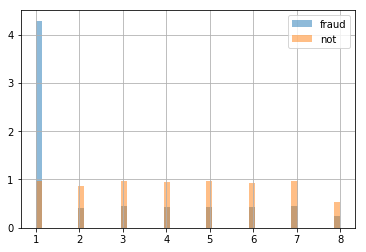

In [46]:
fraud[fraud['class'] == 1]['purchase_mon'].hist(bins=50, alpha=0.5, normed=1, label='fraud')
fraud[fraud['class'] == 0]['purchase_mon'].hist(bins=50, alpha=0.5, normed=1, label='not')
plt.legend()

In [47]:
fraud['source'].value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

In [48]:
fraud['browser'].value_counts()

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

In [49]:
fraud['sex'].value_counts()

M    88293
F    62819
Name: sex, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
encoder.fit_transform(fraud[['browser']])

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 3, ..., 2, 0, 2])

In [51]:
encoder.classes_

array(['Chrome', 'FireFox', 'IE', 'Opera', 'Safari'], dtype=object)

In [52]:
def column_encode(df, cols):
    encoder_dict = {}
    for col in cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoder_dict[col] = encoder.classes_
    return df, encoder_dict
fraud, encoder_dict = column_encode(fraud, ['source', 'browser', 'sex', 'country'])

In [53]:
encoder_dict

{'browser': array(['Chrome', 'FireFox', 'IE', 'Opera', 'Safari'], dtype=object),
 'country': array([None, 'Afghanistan', 'Albania', 'Algeria', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
        'Bhutan', 'Bolivia', 'Bonaire; Sint Eustatius; Saba',
        'Bosnia and Herzegowina', 'Botswana', 'Brazil',
        'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria',
        'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
        'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia',
        'Congo', 'Congo The Democratic Republic of The', 'Costa Rica',
        "Cote D'ivoire", 'Croatia (LOCAL Name: Hrvatska)', 'Cuba',
        'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
        'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
        'Estonia', 'E

In [54]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,multiple_country,multiple_user_dev,mutiple_ip,multiple_user_ip,time_diff_sec,time_diff_days,signup_mon,purchase_mon
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,7.327584e+08,0,85,0,0,0,0,4506682.0,52,2,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,3.503114e+08,0,172,0,0,0,0,17944.0,0,6,6
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,2.621474e+09,1,172,0,1,0,1,1.0,0,1,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,2,4,1,41,3.840542e+09,0,0,0,0,0,0,492085.0,5,4,4
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,4.155831e+08,0,172,0,0,0,0,4361461.0,50,7,7


In [55]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 20 columns):
user_id              151112 non-null int64
signup_time          151112 non-null datetime64[ns]
purchase_time        151112 non-null datetime64[ns]
purchase_value       151112 non-null int64
device_id            151112 non-null object
source               151112 non-null int64
browser              151112 non-null int64
sex                  151112 non-null int64
age                  151112 non-null int64
ip_address           151112 non-null float64
class                151112 non-null int64
country              151112 non-null int64
multiple_country     151112 non-null int64
multiple_user_dev    151112 non-null int64
mutiple_ip           151112 non-null int64
multiple_user_ip     151112 non-null int64
time_diff_sec        151112 non-null float64
time_diff_days       151112 non-null int64
signup_mon           151112 non-null int64
purchase_mon         151112 non-null int64
dtypes

In [56]:
droplist = ['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'class', 'time_diff_days']

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [58]:
X = fraud.drop(droplist, axis=1).values
y = fraud['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [60]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, accuracy_score
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [61]:
def get_metrics(mod, X_test, y_test):
    y_pred = mod.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    ruc = roc_auc_score(y_test, y_pred)
    print 'f1: {:.4f}\tprecision:{:.4f}\trecall: {:.4f}\taccuracy: {:.4f}\tauc: {:.4f}'.format(f1, prec, rec, acc, ruc)

In [62]:
get_metrics(rf, X_test, y_test)

f1: 0.6916	precision:0.9774	recall: 0.5352	accuracy: 0.9558	auc: 0.7669


In [63]:
print y_pred.sum(), y_test.sum()

2297 4195


In [64]:
features = fraud.drop(droplist, axis=1).columns

In [65]:
fea_imp = rf.feature_importances_

In [66]:
features[np.argsort(fea_imp)[::-1]]

Index([u'time_diff_sec', u'multiple_user_ip', u'multiple_user_dev',
       u'purchase_value', u'age', u'country', u'purchase_mon', u'signup_mon',
       u'browser', u'mutiple_ip', u'source', u'multiple_country', u'sex'],
      dtype='object')

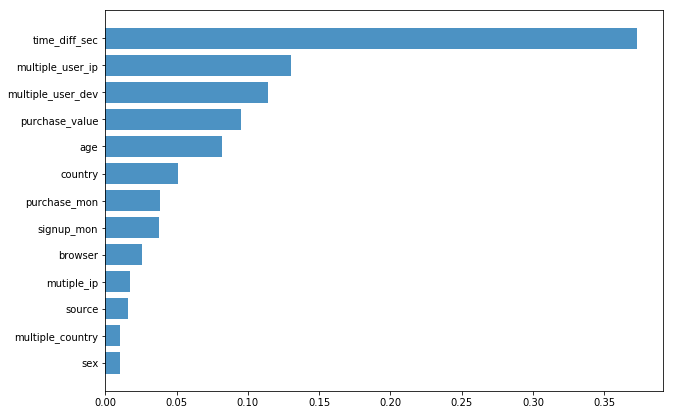

In [67]:
plt.figure(figsize=(10, 7))
plt.barh(range(len(features)), np.sort(fea_imp), alpha=0.8)
plt.yticks(np.arange(len(features)), features[np.argsort(fea_imp)])
plt.show()

In [68]:
from sklearn.metrics import precision_recall_curve
def plot_prec_rec(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    fig, ax1 = plt.subplots(figsize=(10, 10))
    ax2 = ax1.twinx()
    l1, = ax1.plot(recall, precision, lw=2, color='C1',
             label='Precision-Recall curve')
    l2, = ax2.plot(recall[:-1], thresholds, color='C2', label='Threshold')
    ax1.plot(recall, 1-recall, color='C0', linestyle='--')
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax2.set_ylabel('Threshold')
    
    ax1.set_ylim([-0.02, 1.02])
    ax1.set_xlim([-0.02, 1.02])
    ax2.set_ylim([-0.02, 1.02])
    
    lines =[l1, l2]
    plt.title('Precision-Recall')
    plt.legend(lines, [l.get_label() for l in lines], loc="lower left")
    plt.show()

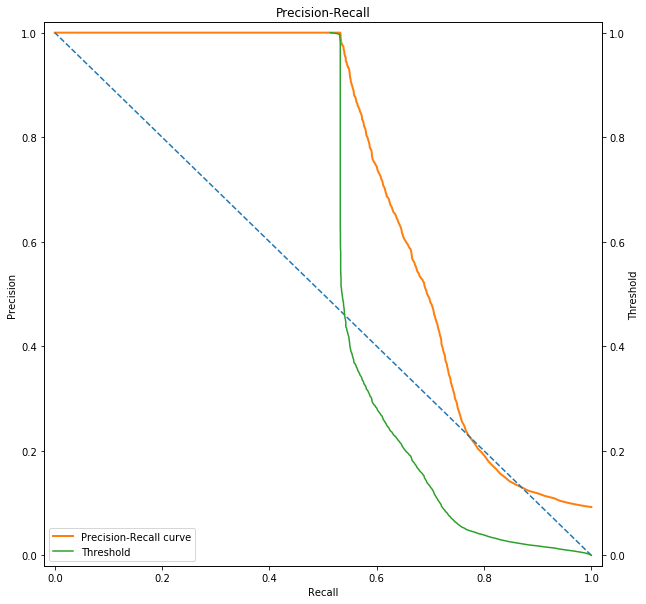

In [69]:
plot_prec_rec(y_test, y_prob[:,1])

In [70]:
from sklearn.metrics import roc_curve
def plot_roc(y_test, y_pred, y_prob):
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    fig, ax1 = plt.subplots(figsize=(10, 10))
    l1, = ax1.plot(fpr, tpr, color='C1', alpha=0.8,
             lw=3, label='ROC curve (area = %0.2f)' % auc)
    ax1.plot([0, 1], [0, 1], color='C0', linestyle='--')
    ax2 = ax1.twinx()
    l2, = ax2.plot(fpr, thresholds, color='C2', label='threshold', alpha=0.8)

    ax1.set_xlabel('False positive rate')
    ax1.set_ylabel('True positive rate')
    ax2.set_ylabel('Threshold')

    ax1.set_ylim([-0.02, 1.02])
    ax1.set_xlim([-0.02, 1.02])
    ax2.set_ylim([-0.02, 1.02])

    ax1.yaxis.label.set_color(l1.get_color())
    ax2.yaxis.label.set_color(l2.get_color())

    ax1.tick_params('y', colors=l1.get_color())
    ax2.tick_params('y', colors=l2.get_color())

    lines = [l1, l2]
    ax1.legend(lines, [l.get_label() for l in lines], loc="right")

    plt.title('Roc Curve and Threashold tuning')
    plt.show()

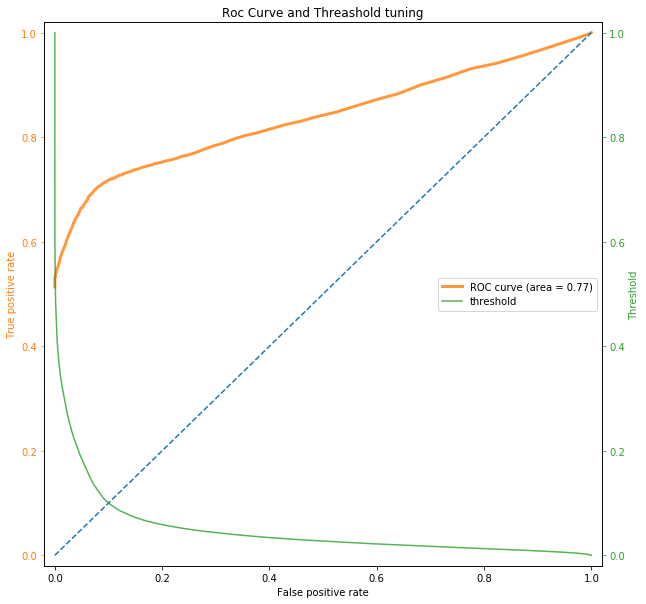

In [71]:
plot_roc(y_test, y_pred, y_prob[:,1])

In [72]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer
# import scipy.stats as sp
# param_dist = {"max_depth": sp.randint(1, 11),
#               "max_features": sp.randint(1, 11),
#               "min_samples_split": sp.randint(2, 11),
#               "min_samples_leaf": sp.randint(1, 11),
#               "criterion": ["gini", "entropy"]}
# rscv = RandomizedSearchCV(rf, param_dist, n_iter=25, cv=5, 
#                           scoring=make_scorer(precision_score), verbose=1, n_jobs=-1)
# rscv.fit(X_train, y_train)
# print rscv.best_score_
# print rscv.best_params_

# rscv2 = RandomizedSearchCV(rf, param_dist, n_iter=25, cv=5,
#                            scoring=make_scorer(recall_score), verbose=1,  n_jobs=-1)
# rscv2.fit(X_train, y_train)
# print rscv2.best_score_
# print rscv2.best_params_

In [73]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [74]:
get_metrics(xgb, X_test, y_test)

f1: 0.6945	precision:0.9996	recall: 0.5321	accuracy: 0.9567	auc: 0.7660


In [75]:
from sklearn.metrics import roc_curve
y_prob = xgb.predict_proba(X_test)
y_pred = xgb.predict(X_test)

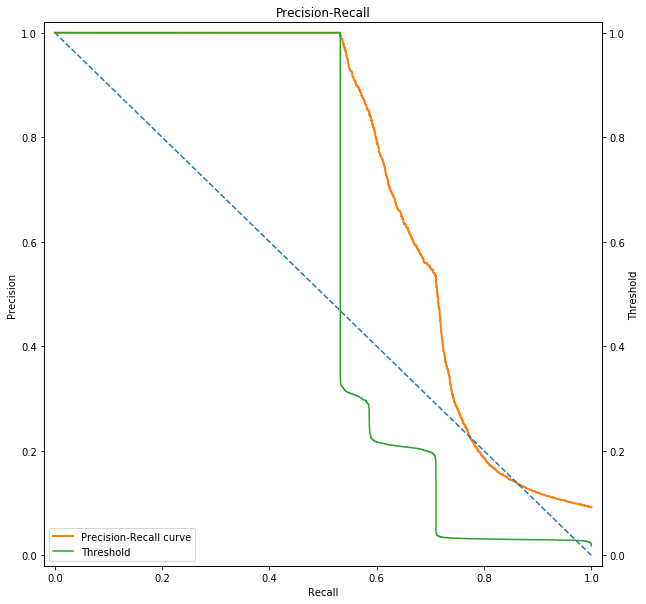

In [76]:
plot_prec_rec(y_test, y_prob[:,1])

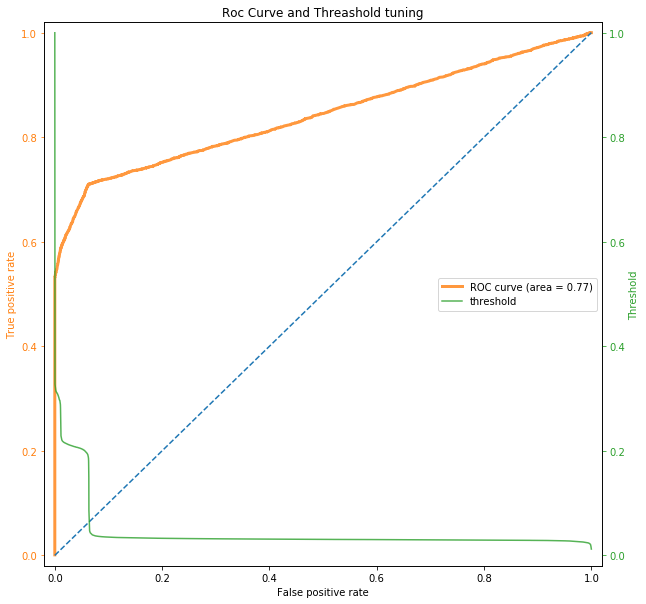

In [77]:
plot_roc(y_test, y_pred, y_prob[:,1])

In [78]:
from imblearn.under_sampling import RandomUnderSampler

In [79]:
sampler = RandomUnderSampler()
X_sam, y_sam = sampler.fit_sample(X_train, y_train)

In [80]:
xgb.fit(X_sam, y_sam)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [81]:

y_prob = xgb.predict_proba(X_test)
y_pred = xgb.predict(X_test)


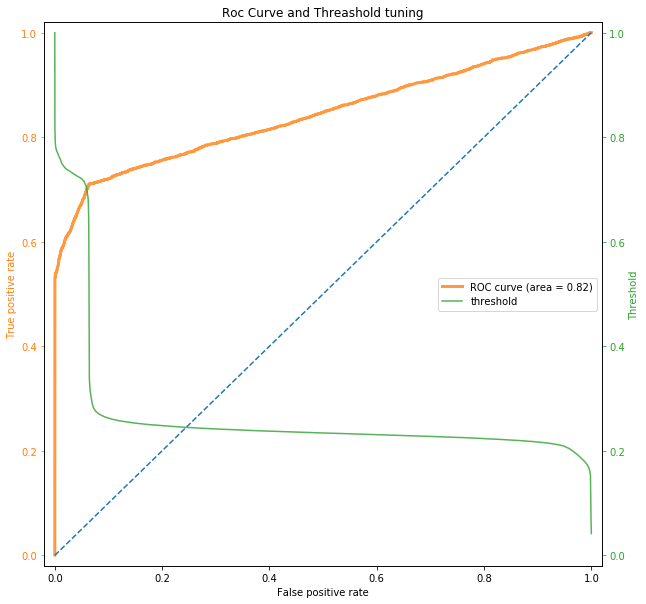

In [82]:
plot_roc(y_test, y_pred, y_prob[:,1])

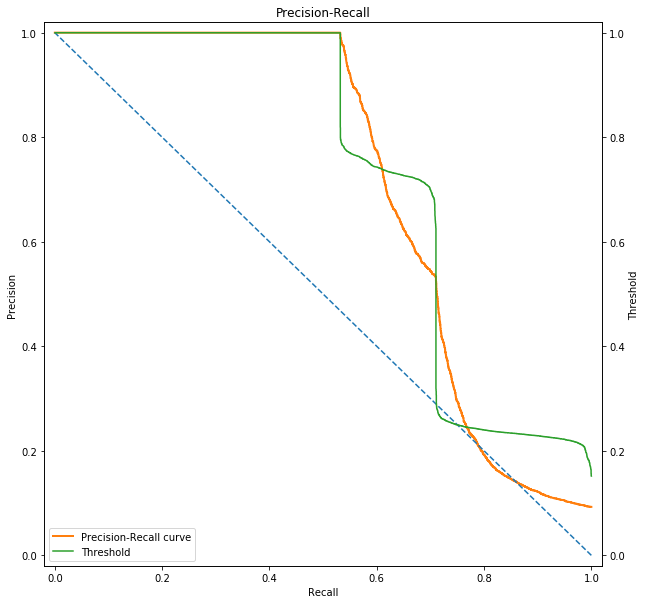

In [83]:
plot_prec_rec(y_test, y_prob[:,1])

In [84]:
fea_imp = xgb.feature_importances_

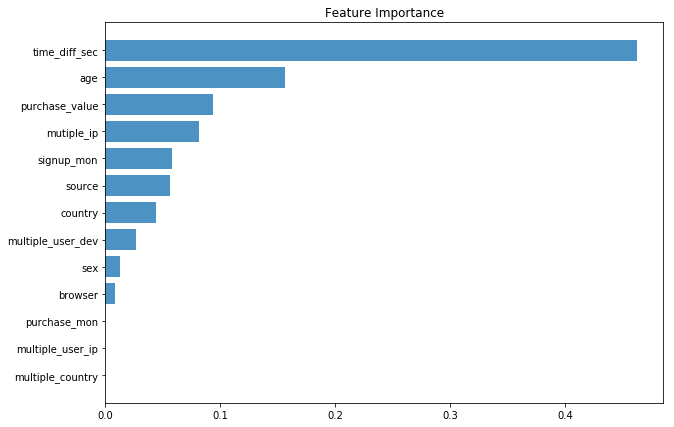

In [85]:
def plot_fea_imp(fea_imp, features):
    plt.figure(figsize=(10, 7))
    plt.barh(range(len(features)), np.sort(fea_imp), alpha=0.8)
    plt.yticks(np.arange(len(features)), features[np.argsort(fea_imp)])
    plt.title('Feature Importance')
    plt.show()
plot_fea_imp(fea_imp, features)

In [86]:
rf.fit(X_sam, y_sam)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [87]:
get_metrics(rf, X_test, y_test)

f1: 0.5869	precision:0.4992	recall: 0.7118	accuracy: 0.9073	auc: 0.8195


In [88]:
get_metrics(xgb, X_test, y_test)

f1: 0.6088	precision:0.5326	recall: 0.7104	accuracy: 0.9155	auc: 0.8234


In [89]:
y_prob = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)

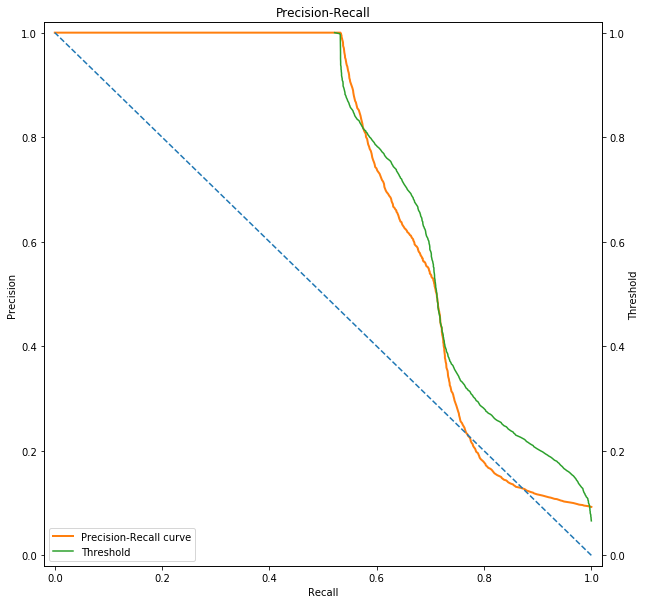

In [90]:
plot_prec_rec(y_test, y_prob[:,1])

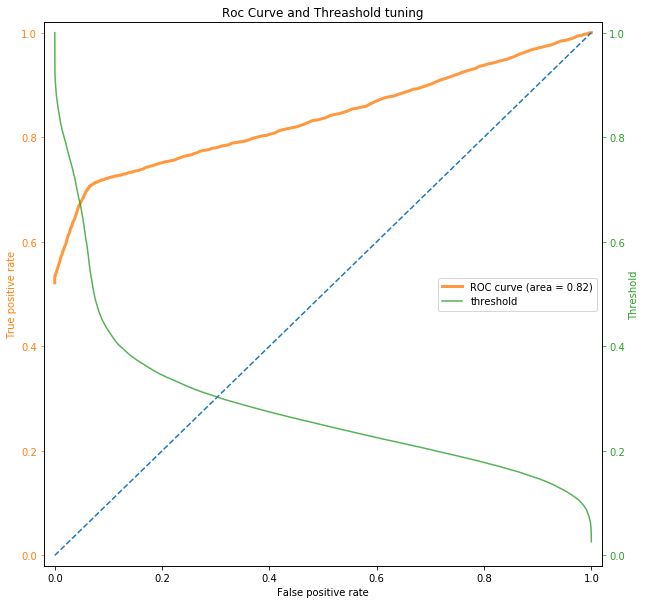

In [91]:
plot_roc(y_test, y_pred, y_prob[:,1])

In [96]:
fraud[(fraud['multiple_user_dev'] == 1) &(fraud['class'] ==1)]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,multiple_country,multiple_user_dev,mutiple_ip,multiple_user_ip,time_diff_sec,time_diff_days,signup_mon,purchase_mon
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,2.621474e+09,1,172,0,1,0,1,1.0,0,1,1
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,1,2,0,35,1.120619e+09,1,172,0,1,0,1,1.0,0,1,1
25,59780,2015-01-04 22:32:33,2015-01-16 01:13:43,31,WUMOBGUCBOXPO,2,1,1,36,1.752167e+09,1,172,1,1,1,0,960070.0,11,1,1
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,2,0,0,27,2.836025e+09,1,172,0,1,0,1,1.0,0,1,1
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,0,1,1,36,2.293333e+09,1,172,0,1,0,1,1.0,0,1,1
77,392706,2015-01-07 08:15:53,2015-01-07 08:15:54,65,VRYLIRAQJIIIE,2,3,0,30,1.213105e+09,1,172,0,1,0,1,1.0,0,1,1
83,67592,2015-01-10 23:23:25,2015-01-10 23:23:26,38,ITUMJCKWEYNDD,0,4,1,43,3.874758e+09,1,0,0,1,0,1,1.0,0,1,1
111,352206,2015-01-06 21:48:13,2015-01-06 21:48:14,45,FRITFBEXOSJEI,0,2,0,22,1.367518e+09,1,171,0,1,0,1,1.0,0,1,1
132,102563,2015-03-26 12:11:48,2015-05-08 11:45:09,45,JUVSDAWADEXXX,2,0,1,41,3.754472e+09,1,160,1,1,1,0,3713601.0,42,3,3
134,104061,2015-01-05 00:09:57,2015-01-05 00:09:58,23,XSEQHFFOYFICY,2,2,1,33,2.011989e+09,1,74,0,1,0,1,1.0,0,1,1


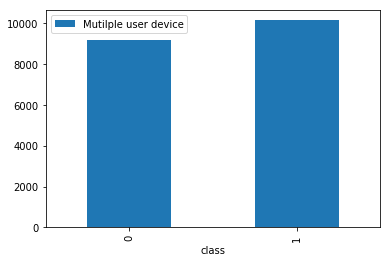

In [103]:
fraud[(fraud['multiple_user_dev'] == 1)].groupby('class')['user_id'].count().plot.bar(label = 'Mutilple user device')
plt.legend()

In [108]:
fraud[(fraud['time_diff_sec'] == 1)].count()

user_id              7600
signup_time          7600
purchase_time        7600
purchase_value       7600
device_id            7600
source               7600
browser              7600
sex                  7600
age                  7600
ip_address           7600
class                7600
country              7600
multiple_country     7600
multiple_user_dev    7600
mutiple_ip           7600
multiple_user_ip     7600
time_diff_sec        7600
time_diff_days       7600
signup_mon           7600
purchase_mon         7600
dtype: int64

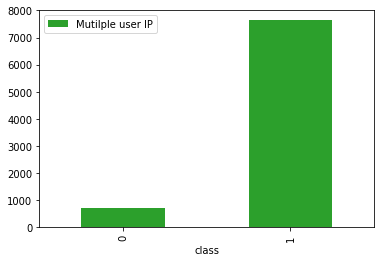

In [114]:
fraud[(fraud['multiple_user_ip'] == 1)].groupby('class')['user_id'].count().plot.bar(label = 'Mutilple user IP', color='C2')
plt.legend()